<a href="https://colab.research.google.com/github/Raafat-Nagy/Deep-Learning-Projects/blob/main/Oral_Diseases_Classification_Project/Predicting_Oral_Diseases_Using_ResNet50V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Oral Diseases Using ResNet50V2


---

## Download the Trained Model from Kaggle

First, we download the necessary utility script and set up Kaggle credentials:


In [1]:
!wget -q -O "dl_utils.py" "https://raw.githubusercontent.com/Raafat-Nagy/Deep-Learning-Projects/refs/heads/main/dl_utils/dl_utils.py"

In [2]:
from dl_utils import setup_kaggle

setup_kaggle()

Please upload your 'kaggle.json' file:


Saving kaggle.json to kaggle.json
✅ Kaggle API is configured successfully!


Now, download the trained model output from Kaggle:

In [3]:
!kaggle kernels output raafatnagy/oral-diseases-classification-using-resnet50v2 -p /content

Output file downloaded to /content/Oral_Diseases_Classification_model.keras
Output file downloaded to /content/__pycache__/dl_utils.cpython-311.pyc
dl_utils.py: Skipping, found more recently modified local copy (use --force to force download)
Output file downloaded to /content/model.png
Kernel log downloaded to /content/oral-diseases-classification-using-resnet50v2.log 


---

## Load the Trained Model and Define Class Names


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [5]:
# Load the trained model
model = tf.keras.models.load_model('Oral_Diseases_Classification_model.keras')

# Define the class names
class_names = ['Calculus', 'Caries', 'Gingivitis', 'Hypodontia', 'Tooth-Discoloration', 'Ulcers']

## Image Preprocessing and Prediction Functions

In [6]:
# Function to load and preprocess an image for prediction
def preprocess_image(image_path, target_size=(256, 256)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    # img_array = tf.keras.applications.resnet_v2.preprocess_input(img_array)  # Uncomment if needed
    return img_array

# Function to predict the class of an image
def predict_image(image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    predicted_prob = np.max(predictions)
    return predicted_class, predicted_prob

# Function to display the image and prediction result
def display_image_and_prediction(image_path):
    # Load and display the image
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Get prediction
    predicted_class, predicted_prob = predict_image(image_path)

    # Display prediction result
    print(f"Predicted Class: {predicted_class}")
    print(f"Prediction Probability: {predicted_prob:.4f}")

## Test with an Example Image

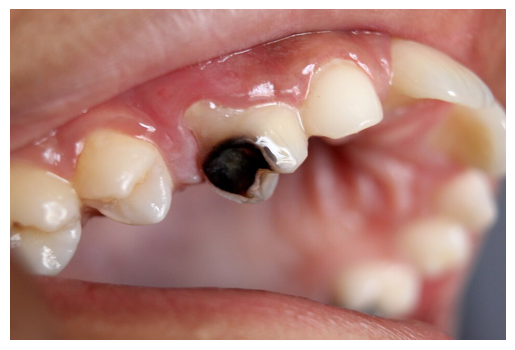

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Predicted Class: Caries
Prediction Probability: 0.9995


In [8]:
!wget -q -O "Oral-Diseases.jpg" "https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Dental_Caries_Cavity_2.JPG/960px-Dental_Caries_Cavity_2.JPG"

image_path = 'Oral-Diseases.jpg'
display_image_and_prediction(image_path)

---